Make simulate data faster using just a unique estimation for each run, and not estimate each time just a single number.

# Set Up

In [7]:
!git clone https://github.com/nudojacopo/thesis.git

fatal: destination path 'thesis' already exists and is not an empty directory.


In [9]:

root='/kaggle/working/'
import sys
module_path = root+'thesis/src/SYN'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
!pip install powerlaw
import powerlaw

In [12]:
from SYN_package.functions import *

## Import Data

In [13]:
!pip install gdown

In [15]:
import gdown

url='https://drive.google.com/uc?id=1fZZefnIvOve2aU9Fg0WGDXncMooQaorA'

output='facebook.csv'

gdown.download(url,output,quiet=False)

url='https://drive.google.com/uc?id=1CYe5nbgFLDgRa7ugsZxOOxLjizQbgFii'

output='reddit.csv'

gdown.download(url,output,quiet=False)

url='https://drive.google.com/uc?id=1K6uRHnR9ZT3k18Ip8jYqIRrrccWFxM03'

output='youtube.csv'

gdown.download(url,output,quiet=False)

url='https://drive.google.com/uc?id=1wvPVrEDGvOX6LO-5Of-LuFyGJ8fI9jEN'

output='voat.csv'

gdown.download(url,output,quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1fZZefnIvOve2aU9Fg0WGDXncMooQaorA
From (redirected): https://drive.google.com/uc?id=1fZZefnIvOve2aU9Fg0WGDXncMooQaorA&confirm=t&uuid=bb9e13bd-0231-4c87-83ca-881e159573ab
To: /kaggle/working/facebook.csv
100%|██████████| 1.17G/1.17G [00:08<00:00, 134MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1CYe5nbgFLDgRa7ugsZxOOxLjizQbgFii
From (redirected): https://drive.google.com/uc?id=1CYe5nbgFLDgRa7ugsZxOOxLjizQbgFii&confirm=t&uuid=1b05148b-3445-462a-88c2-029ad9afa17f
To: /kaggle/working/reddit.csv
100%|██████████| 189M/189M [00:03<00:00, 50.9MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1K6uRHnR9ZT3k18Ip8jYqIRrrccWFxM03
From (redirected): https://drive.google.com/uc?id=1K6uRHnR9ZT3k18Ip8jYqIRrrccWFxM03&confirm=t&uuid=ad6c99f9-885a-429a-80ef-f3b40de5bb63
To: /kaggle/working/youtube.csv
100%|██████████| 1.96G/1.96G [00:11<00:00, 167MB/s] 
Downloading...
From (original): https://drive.g

'voat.csv'

# Model simulation

In [17]:
rd=pd.read_csv('/kaggle/working/reddit.csv')
fb=pd.read_csv('/kaggle/working/facebook.csv')
vo=pd.read_csv('/kaggle/working/voat.csv')
yt=pd.read_csv('/kaggle/working/youtube.csv')

In [18]:
fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_100h'] = fb['temporal_distance_birth_h'] / 100

rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 100

vo = vo[vo['temporal_distance_birth_h'] < 100].copy()
vo['temporal_distance_birth_base_100h'] = vo['temporal_distance_birth_h'] / 100
vo['post_id'] = vo['root_submission']
vo['user_id']=vo['user']

yt = yt[yt['temporal_distance_birth_h'] < 100].copy()
yt['temporal_distance_birth_base_100h'] = yt['temporal_distance_birth_h'] / 100
yt['user_id']=yt['user']

In [ ]:
time_intervals = np.arange(0, 1, 0.01)  # Utilizzo di np.arange per intervalli decimali

fb_ECDF = calculate_ECDF(fb, time_intervals)
fb_ECDF['Platform']='Facebook - News'
rd_ECDF = calculate_ECDF(rd, time_intervals)
rd_ECDF['Platform']='Reddit'

vo_ECDF = calculate_ECDF(vo, time_intervals)
vo_ECDF['Platform']='Voat'

yt_ECDF = calculate_ECDF(yt, time_intervals)
yt_ECDF['Platform']='yt'

combined_results = pd.concat([fb_ECDF, rd_ECDF,vo_ECDF,yt_ECDF], ignore_index=True)


In [ ]:
df=combined_results
plot_ECDF(df,level=99)

## Pipeline to estimate Parameters' dictionary

In [20]:
from SYN_package.estimate_parameters import *
params_dict={}

In [21]:
# Example usage:
names = ['vo', 'fb', 'rd', 'yt']
datas = [vo, fb, rd, yt]  # Assuming vo, fb, rd, yt are your actual dataframes

params_dict = process_social_platform(names, datas)
print(params_dict)

  0%|          | 0/4 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [23]:
params_dict={'vo': {'gamma': 5.560174158235733,
  'a': 0.7683453768943135,
  'b': 181.35859916908146,
  'loc': 0.0009999999999999998,
  'scale': 10.849357267138616,
  'alpha': 0.35,
  'lambda': 0.5000000000000001,
  'c': 1.3825444184574849,
  'd': 0.3148667223304995,
  'l': -7.559994673910446e-07,
  's': 0.014817594985246601,
  'cf': 5.288800316735881,
  'df': 0.04913571005774435,
  'lf': 2.7777777777777775e-06,
  'sf': 0.24403022567064098},
 'fb': {'gamma': 1.920612852062878,
  'a': 0.3844295492882861,
  'b': 294.47288219865607,
  'loc': 0.0009999999999999998,
  'scale': 33.07578198818712,
  'alpha': 0.1,
  'lambda': 1.0500000000000003,
  'c': 1.4925263821442911,
  'd': 0.08849381153322906,
  'l': 2.7777777777777775e-06,
  's': 1.3440750553651393,
  'cf': 1.1530515610823424,
  'df': 0.1221286925154284,
  'lf': 2.7777777777777775e-06,
  'sf': 1.243471290490271},
 'rd': {'gamma': 2.1172386372477376,
  'a': 1.3208418726992361,
  'b': 366274394.2558266,
  'loc': 0.00043188573340450587,
  'scale': 21377429.04281839,
  'alpha': 0.3,
  'lambda': 0.5000000000000001,
  'c': 1.4035122312087873,
  'd': 0.34547543092801714,
  'l': 2.777777777776469e-06,
  's': 0.009685929534020282,
  'cf': 1.061267002974987,
  'df': 0.16381176822206486,
  'lf': 2.7777777777777775e-06,
  'sf': 1.708837260306469},
 'yt': {'gamma': 1.4925219530385783,
  'a': 0.5186615140672572,
  'b': 1.7898387515641103,
  'loc': 0.0009999999999999998,
  'scale': 1.1104373293304093,
  'alpha': 0.25,
  'lambda': 0.7000000000000002,
  'c': 0.23913021624295291,
  'd': 0.8360268077508817,
  'l': 2.7777777777777775e-06,
  's': 1.1670856167197128,
  'cf': 0.9540739202382167,
  'df': 0.16186901441564588,
  'lf': 2.7777777777777775e-06,
  'sf': 1.6193827108817946}}

Processing DataFrame: 100%|██████████| 100/100 [00:07<00:00, 12.85it/s]
/tmp/ipykernel_33/717161407.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sns.lineplot(data=df_all, x='Time Grid Value', y='Share', hue='Platform', style='Style', err_style='band', ci=99)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


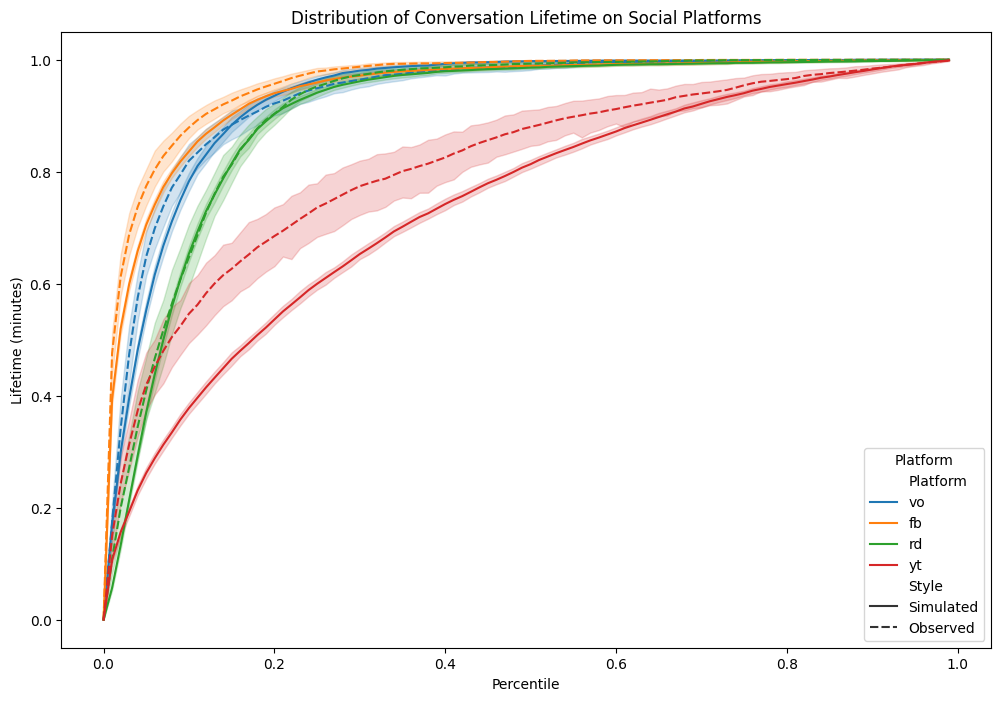

In [24]:
names = ['vo', 'fb', 'rd', 'yt']
datas = [vo, fb, rd, yt]  # Assuming vo, fb, rd, yt are your actual dataframes
time_intervals = np.arange(0, 1, 0.01)
all_dfs=[]
for i,df in  (enumerate(datas)):#,total=len(datas))
    social=names[i]
    parameters=params_dict[social]
    # Simulazione dei dati per la piattaforma corrente
    n = 100
    simulated_t, observed_t = simulate_data(df, parameters['gamma'], parameters['a'], parameters['b'], parameters['loc'],
                                            parameters['scale'], parameters['alpha'], parameters['lambda'], parameters['c'],
                                            parameters['d'], parameters['l'], parameters['s'], parameters['cf'],
                                            parameters['df'], parameters['lf'], parameters['sf'], num_threads=n,activate_tqdm=False)
    simulated_t.to_csv('/kaggle/working/simulated'+social+'.csv', index=False)
    observed_t.to_csv('/kaggle/working/observed'+social+'.csv', index=False)
    
    # Calcolo dell'ECDF per i dati simulati e osservati
    simulated_t_ECDF = calculate_ECDF(simulated_t, time_intervals)
    simulated_t_ECDF['Platform'] = social
    simulated_t_ECDF['Style'] = 'Simulated'

    observed_t_ECDF = calculate_ECDF(observed_t, time_intervals)
    observed_t_ECDF['Platform'] = social
    observed_t_ECDF['Style'] = 'Observed'

    # Concatenazione dei dataframe per simulati e osservati per la piattaforma corrente
    df_platform = pd.concat([simulated_t_ECDF, observed_t_ECDF], ignore_index=True)
    all_dfs.append(df_platform)

# Concatenazione di tutti i dataframe delle piattaforme
df_all = pd.concat(all_dfs, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_all, x='Time Grid Value', y='Share', hue='Platform', style='Style', err_style='band', ci=99)
plt.title('Distribution of Conversation Lifetime on Social Platforms')
plt.ylabel('Lifetime (minutes)')
plt.xlabel('Percentile')
plt.grid(False)
plt.legend(title='Platform')
plt.show()